In [338]:
#Importing the data labelled as excel file
import pandas as pd
data=pd.read_excel("DLI_CO_DATA.xlsx")
data=data.iloc[:,[0,1,2,3,4,5,6]]
#Checking the first five rows of data
data.tail()

,Date/Time,NO2 (μg/m3),SO2 (μg/m3),O3 (μg/m3),CO (μg/m3),PM10 (μg/m3),PM 2.5 (μg/m3)
7531,2020-11-09 19:00:00,123.66430,6.942140,2.626272,2626.576,112.54680,34.47053
7532,2020-11-09 20:00:00,102.62100,7.881799,2.665070,2744.537,185.77910,51.01247
7533,2020-11-09 21:00:00,83.50191,6.309392,1.787648,2180.894,152.05290,50.29734
7534,2020-11-09 22:00:00,65.23309,5.243093,1.287961,1759.910,122.83820,48.03581
7535,2020-11-09 23:00:00,56.35237,3.984219,1.077103,1304.964,94.77707,41.15864


In [339]:
#Filling the missing values in each column with mean of each column
data.fillna(value=data.mean(), inplace=True)

<ipython-input-339-1a4c97abfd99>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(value=data.mean(), inplace=True)


In [340]:
# Deriving the two columns: Date/Time and CO
data1=data.iloc[:,[0,1,2,3,4,5,6]]
#data.columns=['Date','CO']
#Printing the date upto period 'Day'
data1['Date'] = pd.to_datetime(data1['Date/Time']).dt.to_period('H')
#Drops all rows with missing values
data1=data1.dropna()
#Setting the date column as an index column to allow resampling
#Resampling data to give only the mean daily CO concentrations
data1=data1.resample('D').mean()
data1['Date'] = data1.index
data1=data.iloc[:,[0,1,2,3,4,5,6]]

data1.columns=['Date','NO2','SO2','O3','CO','PM10','PM2.5']
#data1=data1.set_index('Date')
#data1['Date'] = data1.index
data1.tail()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [341]:
#data1['time_Hour'] = data1['Date'].hour
data1['Hour'] = data1['Date'].dt.hour
data1.head()

,Date/Time,NO2 (μg/m3),SO2 (μg/m3),O3 (μg/m3),CO (μg/m3),PM10 (μg/m3),PM 2.5 (μg/m3),Date,Hour
0,2020-01-01 00:00:00,41.65320,4.213766,5.423789,1045.9150,113.18510,89.80502,2020-01-01 00:00,0
1,2020-01-01 01:00:00,41.00579,3.987211,7.721677,978.0149,49.54911,35.75103,2020-01-01 01:00,1
2,2020-01-01 02:00:00,50.21675,4.940739,4.494381,1264.3850,64.78768,35.52024,2020-01-01 02:00,2
3,2020-01-01 03:00:00,50.81709,5.307842,3.018368,1119.1360,60.34821,38.61661,2020-01-01 03:00,3
4,2020-01-01 04:00:00,36.80474,4.320927,1.702769,1103.0710,39.07967,28.65631,2020-01-01 04:00,4


In [324]:
#data1=data1.set_index('Hour')
data1.dtypes

Date     datetime64[ns]
NO2             float64
SO2             float64
O3              float64
CO              float64
PM10            float64
PM2.5           float64
Hour              int64
dtype: object

In [325]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [326]:
data2=data1.groupby('Hour', as_index=False).mean()
data2.head()

,Hour,NO2,SO2,O3,CO,PM10,PM2.5
0,0,20.528807,3.086294,55.326606,485.113917,34.262585,18.781051
1,1,17.488867,2.794634,55.064324,401.858420,31.561431,17.338424
2,2,15.395535,2.519356,54.852468,343.013216,28.708424,16.044638
3,3,14.732627,2.537424,53.540172,307.897348,26.397908,14.887364
4,4,14.841179,2.394238,51.877528,291.567565,25.319819,14.264587


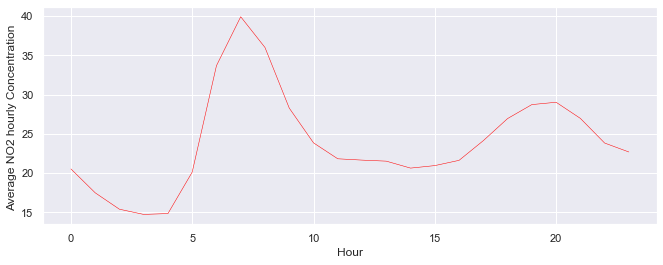

In [327]:
data2=data2.set_index('Hour')
data2['NO2'].plot(linewidth=0.5,color='red',ylabel='Average NO2 hourly Concentration ');


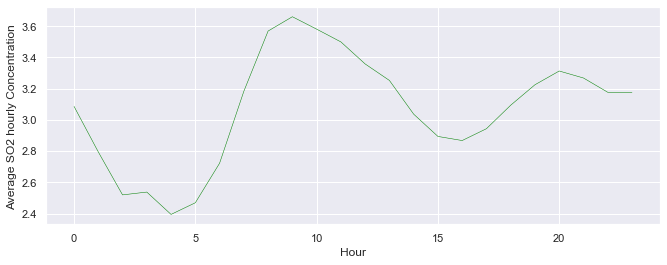

In [328]:
data2['SO2'].plot(linewidth=0.5,color='green',ylabel='Average SO2 hourly Concentration ');


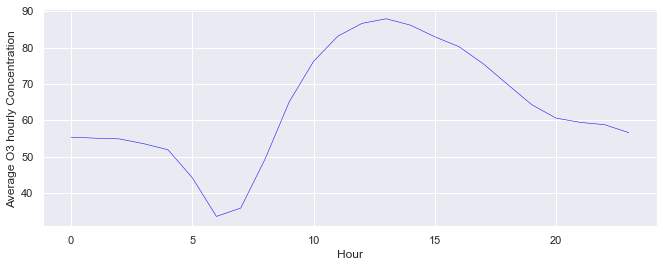

In [329]:
data2['O3'].plot(linewidth=0.5,color='blue',ylabel='Average O3 hourly Concentration ');


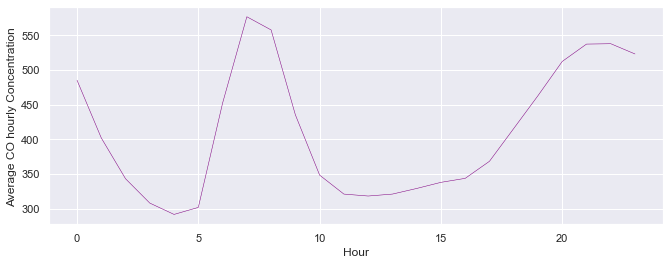

In [330]:
data2['CO'].plot(linewidth=0.5,color='purple',ylabel='Average CO hourly Concentration ');


In [331]:
data3=data1
data3['Month'] = data1['Date'].dt.month
data3=data3.groupby('Month', as_index=False).mean()
data3


,Month,NO2,SO2,O3,CO,PM10,PM2.5,Hour
0,1,37.660010,3.878183,29.124350,728.630722,36.477901,16.357469,11.5
1,2,33.245574,4.081818,41.067349,522.329846,33.403141,15.762335,11.5
2,3,21.720997,4.002068,57.059671,390.519877,31.099771,13.556300,11.5
3,4,11.815090,2.381913,73.914539,268.082820,26.151107,12.728416,11.5
4,5,16.719994,2.685670,71.927980,310.151218,26.623434,12.789590,11.5
5,6,17.311691,2.966819,76.724842,295.874316,26.106679,11.598585,11.5
6,7,20.125013,2.610663,82.257354,360.691518,34.337453,17.274398,11.5
7,8,19.289665,2.453417,85.701561,353.005503,36.937982,21.559453,11.5
8,9,27.007398,2.766963,71.537511,407.216594,41.400452,19.279358,11.5
9,10,30.305513,2.634194,54.053960,422.824850,39.828727,17.869497,11.5


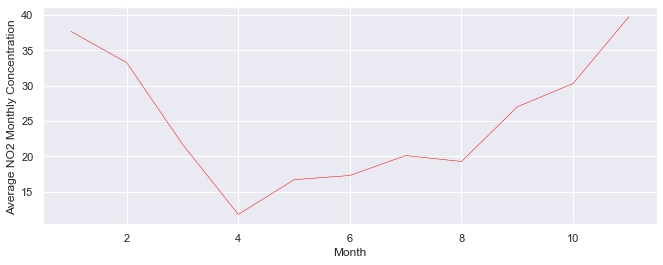

In [332]:
data3=data3.set_index('Month')
data3['NO2'].plot(linewidth=0.5,color='red',ylabel='Average NO2 Monthly Concentration ');

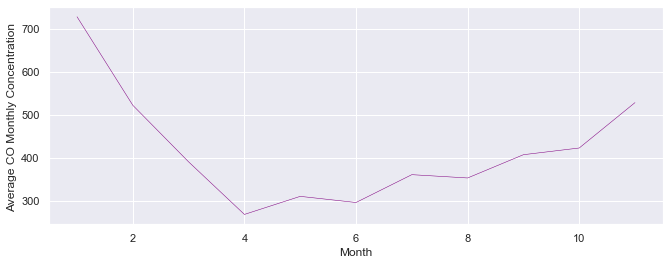

In [333]:
data3['CO'].plot(linewidth=0.5,color='purple',ylabel='Average CO Monthly Concentration ');

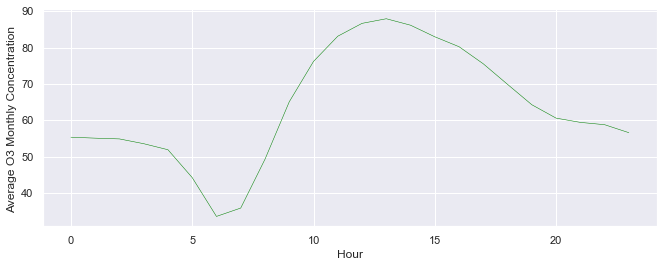

In [334]:
data2['O3'].plot(linewidth=0.5,color='green',ylabel='Average O3 Monthly Concentration ');

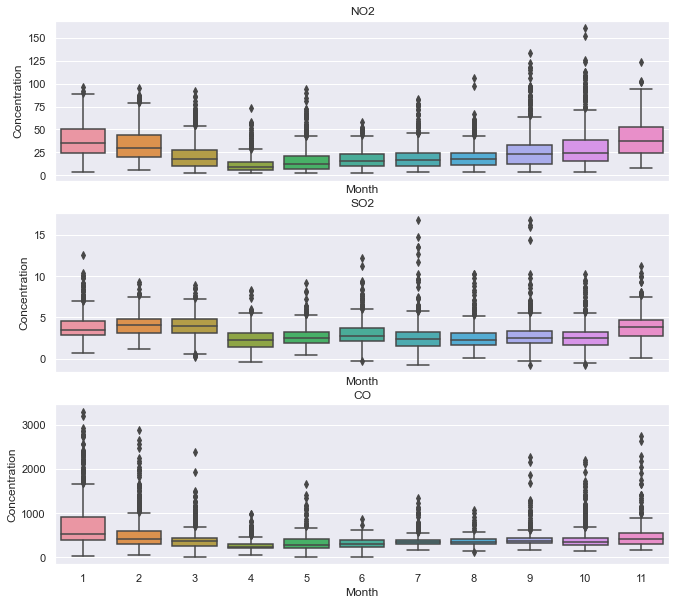

In [335]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['NO2', 'SO2', 'CO'], axes):
    sns.boxplot(data=data1, x='Month', y=name, ax=ax)
    ax.set_ylabel('Concentration')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [336]:
data1['Weekday '] = data1['Date'].dt.day_name()

data1.head()

,Date,NO2,SO2,O3,CO,PM10,PM2.5,Hour,Month,Weekday
0,2020-01-01 00:00:00,41.65320,4.213766,5.423789,1045.9150,113.18510,89.80502,0,1,Wednesday
1,2020-01-01 01:00:00,41.00579,3.987211,7.721677,978.0149,49.54911,35.75103,1,1,Wednesday
2,2020-01-01 02:00:00,50.21675,4.940739,4.494381,1264.3850,64.78768,35.52024,2,1,Wednesday
3,2020-01-01 03:00:00,50.81709,5.307842,3.018368,1119.1360,60.34821,38.61661,3,1,Wednesday
4,2020-01-01 04:00:00,36.80474,4.320927,1.702769,1103.0710,39.07967,28.65631,4,1,Wednesday


In [337]:
data1=data1.resample('D').mean()
data1['Weekday'] = data1.index


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
sns.boxplot(data=data1, x='Weekday', y='CO');


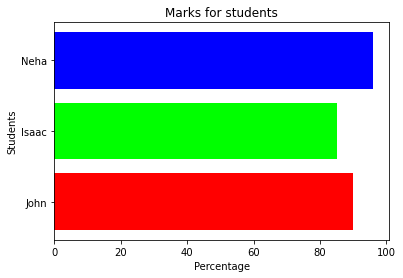

In [8]:
import matplotlib.pyplot as plt
students=['John','Isaac', 'Neha']
Marks=[90,85,96]
color=['red','lime','blue']
plt.barh(students,Marks, color=color)
plt.title('Marks for students')
plt.xlabel('Percentage')
plt.ylabel('Students')
plt.show()